In [1]:
from transformers import pipeline

In [2]:
senti_analysis=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
import pandas as pd
df=pd.read_csv("healthcare_reviews.csv")

In [5]:
df = df.fillna("normal")

In [6]:
df

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3
...,...,...
995,My experience was terrible. I would not recomm...,5
996,The service was disappointing. I won't be comi...,4
997,"The service was okay, but nothing exceptional.",3
998,I have mixed feelings about my experience.,5


In [7]:
Reviewtype=[]
for i in df["Review_Text"]:
    b=senti_analysis(i)
    b1=b[0]
    b2=b1
    b2=b1['score']
    if b1['label']=='POSITIVE':
        Reviewtype.append(b2)
    else:
        Reviewtype.append(-b2)

In [8]:
df['Reviewtype'] = Reviewtype

In [9]:
df

,Review_Text,Rating,Reviewtype
0,I have mixed feelings about my experience.,4,-0.991530
1,The staff was caring and attentive. I couldn't...,5,0.998727
2,I have mixed feelings about my experience.,5,-0.991530
3,I have mixed feelings about my experience.,5,-0.991530
4,The healthcare provider was excellent. I had a...,3,0.999864
...,...,...,...
995,My experience was terrible. I would not recomm...,5,-0.998264
996,The service was disappointing. I won't be comi...,4,-0.999603
997,"The service was okay, but nothing exceptional.",3,-0.975136
998,I have mixed feelings about my experience.,5,-0.991530


In [10]:


data1 = ['POSITIVE','NEGATIVE']
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(data1)

print(encoded_data)

[1 0]


In [11]:
Reviewnumber=[]
for k in df["Review_Text"]:
    k=senti_analysis(k)
    k1=k[0]
    k2=k1['label']
    k3=data1.index(k2)
    k4=encoded_data[k3]
    Reviewnumber.append(k4)

In [12]:
print(encoded_data[data1.index('NEGATIVE')])

0


In [13]:
df['Reviewnumber'] = Reviewnumber

In [14]:
df

,Review_Text,Rating,Reviewtype,Reviewnumber
0,I have mixed feelings about my experience.,4,-0.991530,0
1,The staff was caring and attentive. I couldn't...,5,0.998727,1
2,I have mixed feelings about my experience.,5,-0.991530,0
3,I have mixed feelings about my experience.,5,-0.991530,0
4,The healthcare provider was excellent. I had a...,3,0.999864,1
...,...,...,...,...
995,My experience was terrible. I would not recomm...,5,-0.998264,0
996,The service was disappointing. I won't be comi...,4,-0.999603,0
997,"The service was okay, but nothing exceptional.",3,-0.975136,0
998,I have mixed feelings about my experience.,5,-0.991530,0


In [15]:
type=[]
for i in range(len(df["Rating"])):
    if df["Rating"][i] >3 and df["Reviewnumber"][i] ==1:
        type.append('POSITIVE')
    elif df["Rating"][i] <3 and df["Reviewnumber"][i] == 0:
        type.append('NEGATIVE')
    else:
        type.append('MID')

In [16]:
df['Type'] = type

In [17]:
df

,Review_Text,Rating,Reviewtype,Reviewnumber,Type
0,I have mixed feelings about my experience.,4,-0.991530,0,MID
1,The staff was caring and attentive. I couldn't...,5,0.998727,1,POSITIVE
2,I have mixed feelings about my experience.,5,-0.991530,0,MID
3,I have mixed feelings about my experience.,5,-0.991530,0,MID
4,The healthcare provider was excellent. I had a...,3,0.999864,1,MID
...,...,...,...,...,...
995,My experience was terrible. I would not recomm...,5,-0.998264,0,MID
996,The service was disappointing. I won't be comi...,4,-0.999603,0,MID
997,"The service was okay, but nothing exceptional.",3,-0.975136,0,MID
998,I have mixed feelings about my experience.,5,-0.991530,0,MID


In [18]:
X = df[['Reviewtype','Reviewnumber','Rating']]
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


# Evaluate the model
y_pred = model.predict(X_test)
print("CONFUSION-MATRIX")
print(confusion_matrix(y_test, y_pred))
print("CLASSIFICATION-REPORT")
print(classification_report(y_test, y_pred))

CONFUSION-MATRIX
[[113   0   0]
 [  0  44   0]
 [  0   0  43]]
CLASSIFICATION-REPORT
              precision    recall  f1-score   support

         MID       1.00      1.00      1.00       113
    NEGATIVE       1.00      1.00      1.00        44
    POSITIVE       1.00      1.00      1.00        43

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [22]:
def classify_review(review_text, rating):
    # Determine the sentiment
    sentiment_result = senti_analysis(review_text)
    sentiment_score = sentiment_result[0]['score']
    sentiment_label = sentiment_result[0]['label']

    # Convert sentiment label to corresponding number (encoding)
    if sentiment_label == 'POSITIVE':
        review_number = 1  # Assume 1 is the encoded value for 'POSITIVE'
    else:
        review_number = 0  # Assume 0 is the encoded value for 'NEGATIVE'

    # Prepare the feature for prediction
    new_data = pd.DataFrame([[sentiment_score, review_number, rating]], columns=['Reviewtype', 'Reviewnumber', 'Rating'])

    # Predict the classification
    prediction = model.predict(new_data)
    return prediction[0]

# Example usage
new_review_text =input("review text:")
new_rating = int(input("rating from 1-5:"))
predicted_class = classify_review(new_review_text, new_rating)
print(f"The predicted classification for the new review is: {predicted_class}")

review text: bad
rating from 1-5: 1


The predicted classification for the new review is: NEGATIVE


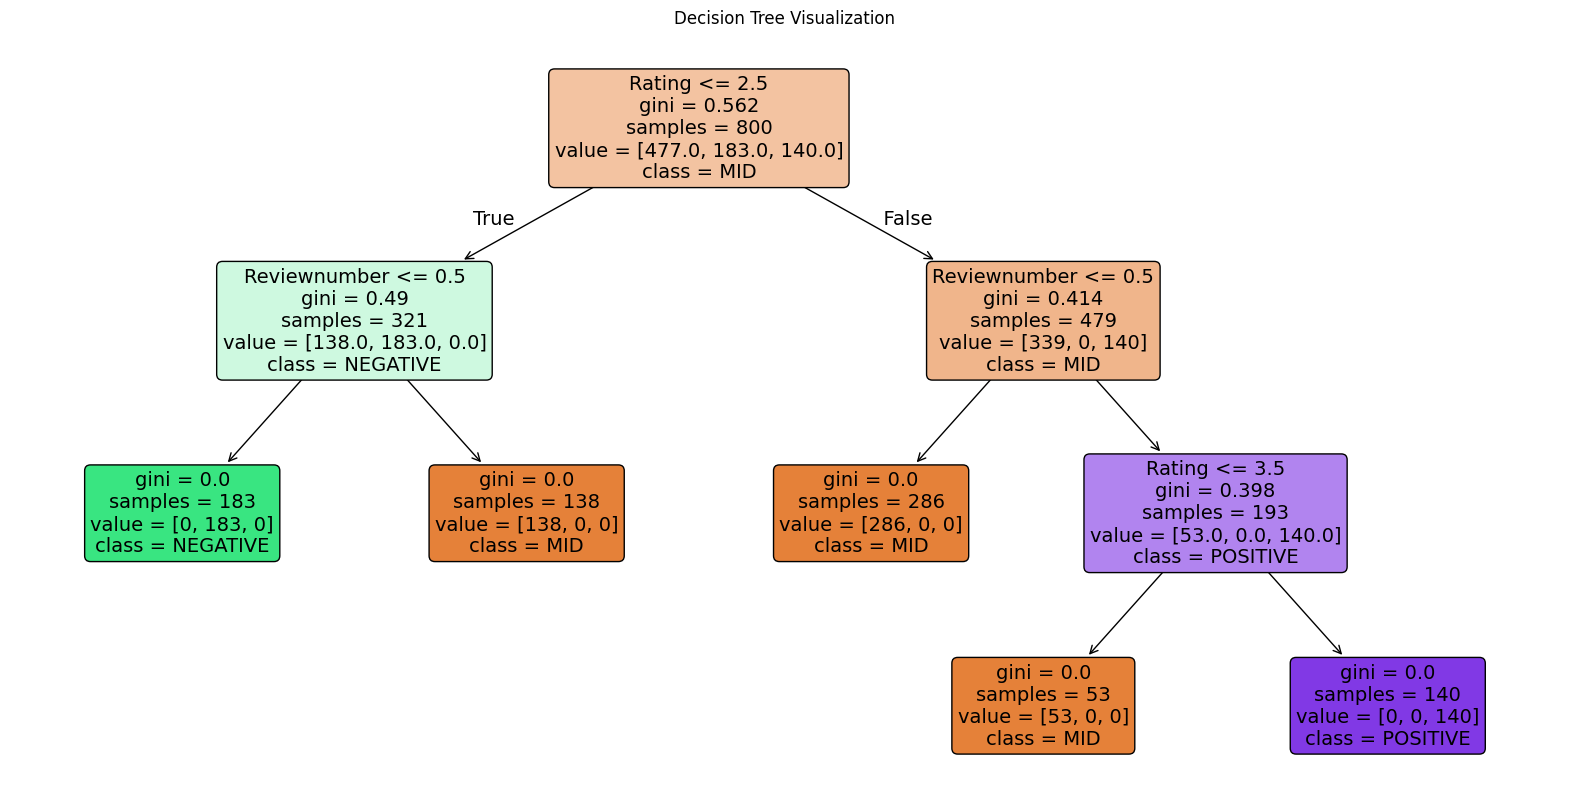

In [23]:

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, 
          feature_names=X.columns, 
          class_names=model.classes_, 
          filled=True, 
          rounded=True,
          fontsize=14)
plt.title('Decision Tree Visualization')
plt.show()

In [24]:

model1 = LogisticRegression()
model1.fit(X_train, y_train)


# Evaluate the model
y_pred = model1.predict(X_test)
print("CONFUSION-MATRIX")
print(confusion_matrix(y_test, y_pred))
print("CLASSIFICATION-REPORT")
print(classification_report(y_test, y_pred))

CONFUSION-MATRIX
[[113   0   0]
 [  0  44   0]
 [  0   0  43]]
CLASSIFICATION-REPORT
              precision    recall  f1-score   support

         MID       1.00      1.00      1.00       113
    NEGATIVE       1.00      1.00      1.00        44
    POSITIVE       1.00      1.00      1.00        43

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [25]:
def classify_review(review_text, rating):
    # Determine the sentiment
    sentiment_result = senti_analysis(review_text)
    sentiment_score = sentiment_result[0]['score']
    sentiment_label = sentiment_result[0]['label']

    # Convert sentiment label to corresponding number (encoding)
    if sentiment_label == 'POSITIVE':
        review_number = 1  # Assume 1 is the encoded value for 'POSITIVE'
    else:
        review_number = 0  # Assume 0 is the encoded value for 'NEGATIVE'

    # Prepare the feature for prediction
    new_data = pd.DataFrame([[sentiment_score, review_number, rating]], columns=['Reviewtype', 'Reviewnumber', 'Rating'])

    # Predict the classification
    prediction = model1.predict(new_data)
    return prediction[0]

# Example usage
new_review_text =input("review text:")
new_rating = int(input("rating from 1-5:"))
predicted_class = classify_review(new_review_text, new_rating)
print(f"The predicted classification for the new review is: {predicted_class}")

review text: bad
rating from 1-5: 1


The predicted classification for the new review is: MID
